# 7. Machine Learning: Part 1

![](images/logo.png)

Hello and welcome to session 7 of the Visual Analytics with Python and Power BI, hosted by the DataKirk. In this session we will be using the K-nearest neighbours algorithm from scikit learn to try and perform medical diagnoses. 

If you're working on the server at https://jupyterhub.thedatakirk.org.uk/ then all the relevant libraries (Scikit learn, Pandas etc) should already be installed and ready to use. However, if you're running the code on your own computer (which we do advise at this point as it will accelerate your learning!) then you'll need to make sure that you have installed them. This can be done by opening up a command prompt and typing 

```
pip install matplotlib pandas scikit-learn
```

To check whether you have these libraries installed, run the cell below.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

As long as you get no errors, you are good to go! Once the libraries are imported, it's also a good idea to run the line in the cell below:

In [2]:
%matplotlib notebook

Now we're ready to go!

# Part 1: Examining the data

In this session we will be looking at the  well-known [Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29), donated to the University of California, Irvine (UCI) collection from the University of Wisconsin-Madison.

The purpose of this dataset is to predict whether a patient will develop breast cancer. In order to make this prediction, we are given a number of measurements which have been taken on the cells of a potentially cancerous tumour. Those measurements include:

1. Clump Thickness: 1 - 10
2. Uniformity of Cell Size: 1 - 10
3. Uniformity of Cell Shape: 1 - 10
4. Marginal Adhesion: 1 - 10
5. Single Epithelial Cell Size: 1 - 10
6. Bare Nuclei: 1 - 10
7. Bland Chromatin: 1 - 10
8. Normal Nucleoli: 1 - 10
9. Mitoses: 1 - 10 

#### Load this dataset from the csv file and take a look

In [3]:
data = pd.read_csv('data/breast-cancer.csv')
data

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,10,5,6,10,6,10,7,7,10,1
1,1,2,2,1,2,1,2,1,1,0
2,1,1,1,1,2,1,3,1,1,0
3,5,10,10,3,7,3,8,10,2,1
4,8,10,10,10,6,10,10,10,10,1
...,...,...,...,...,...,...,...,...,...,...
678,4,1,2,1,2,1,2,1,1,0
679,5,8,4,10,5,8,9,10,1,1
680,10,1,1,1,2,10,5,4,1,1
681,4,1,3,3,2,1,1,1,1,0


We can examine the distrubution of values within a column using `plt.hist()`. Below is a histogram of the firt column. 

<IPython.core.display.Javascript object>


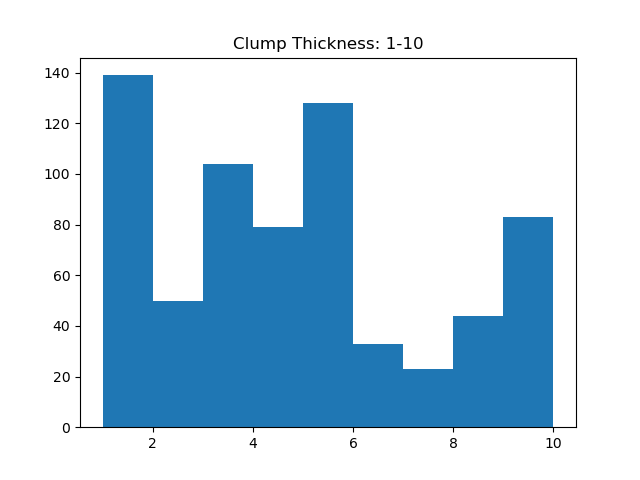

Text(0.5, 1.0, 'Clump Thickness: 1-10')

In [4]:
plt.figure()

plt.hist(data['clump_thickness'], bins=9)

plt.title('Clump Thickness: 1-10')

#### Do the same for some of the other columns. 

Are there any interesting patterns? 

<IPython.core.display.Javascript object>


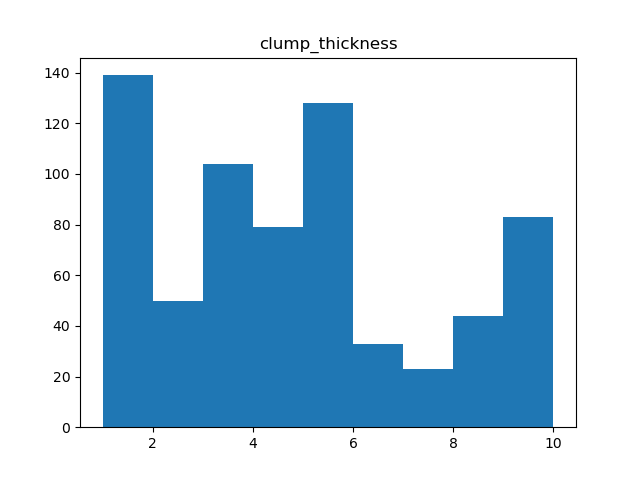

<IPython.core.display.Javascript object>


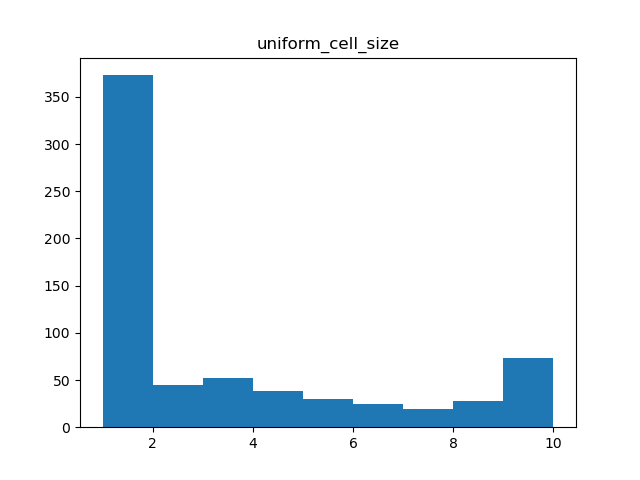

<IPython.core.display.Javascript object>


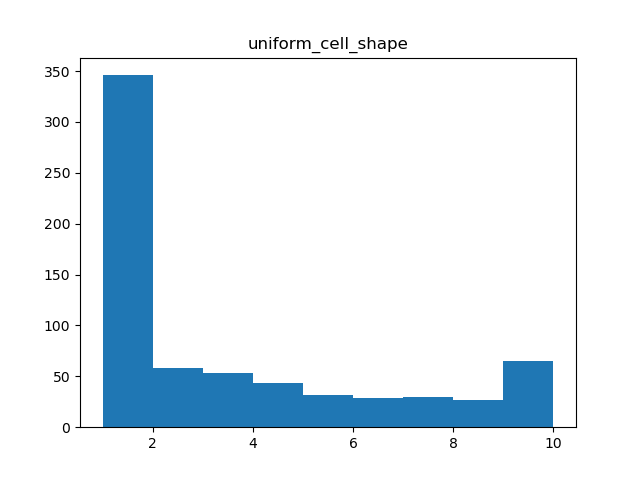

<IPython.core.display.Javascript object>


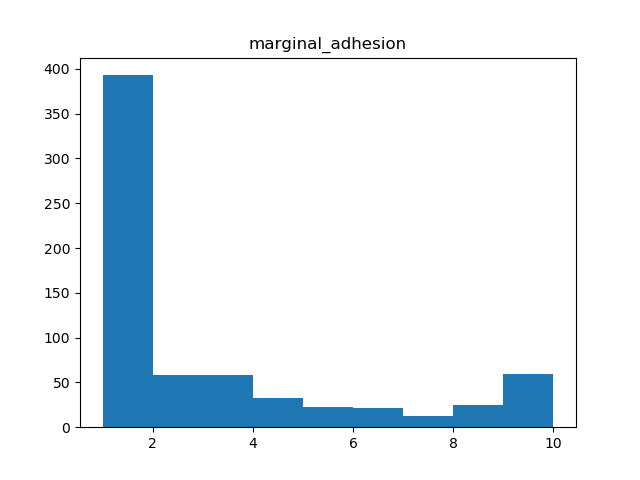

<IPython.core.display.Javascript object>


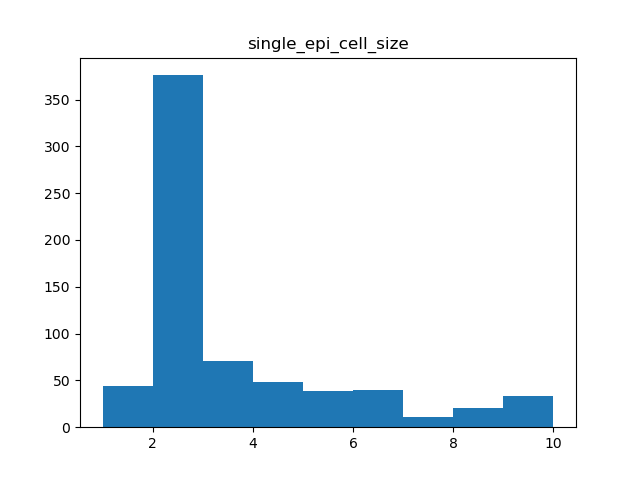

<IPython.core.display.Javascript object>


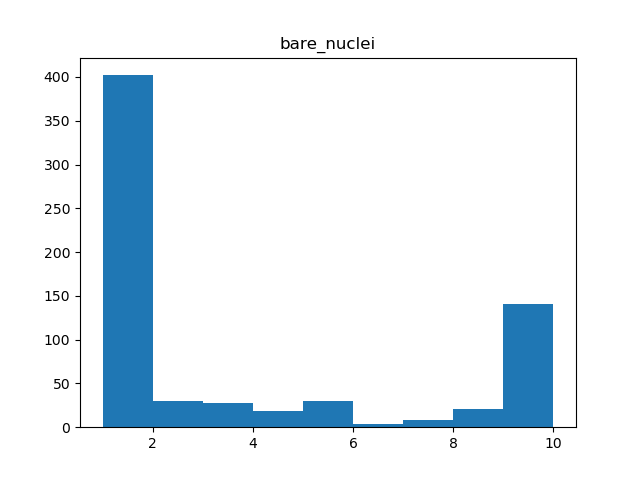

<IPython.core.display.Javascript object>


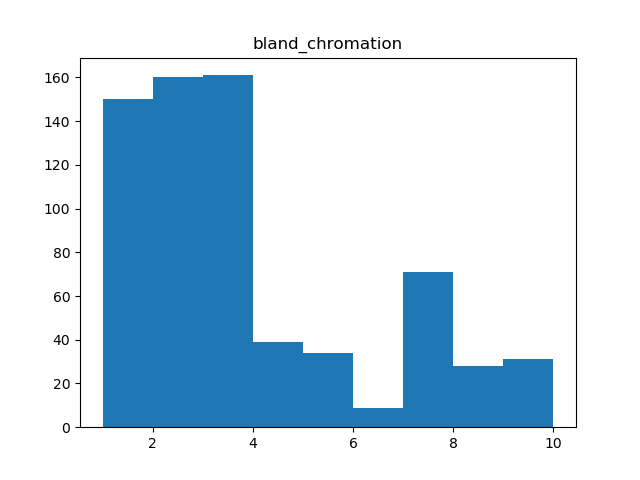

<IPython.core.display.Javascript object>


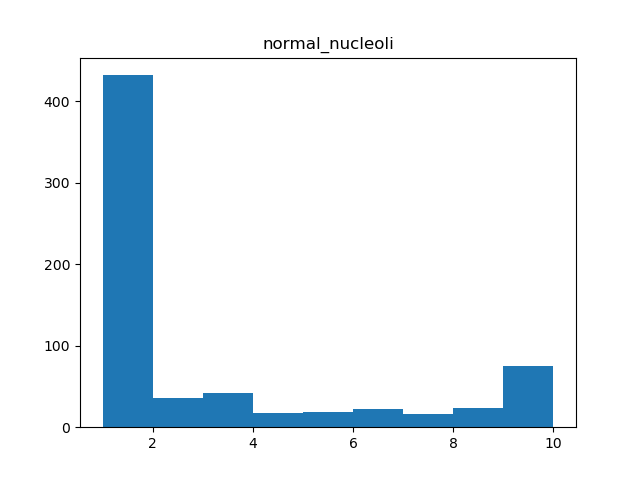

<IPython.core.display.Javascript object>


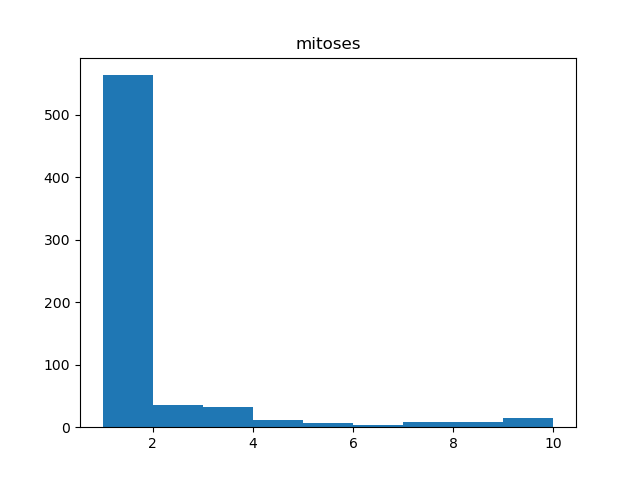

In [7]:

cols = ['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epi_cell_size', 'bare_nuclei',
       'bland_chromation', 'normal_nucleoli', 'mitoses']

for col in cols:
    
    plt.figure()
    
    plt.hist(data[col], bins=9)
    
    plt.title(col)


In this dataset, a cancerous tumour is indicated with a 1, and a benign tumour is indicated with a 0. 

#### Use the dataframe to find out whether there are more cancerous or benign tumours in this dataset. 

In [10]:
n_canc = data['class'].sum()
n_begn = len(data) - n_canc

print('There are', n_canc, 'cancerous tumours and',  n_begn, 'benign tumours')



There are 239 cancerous tumours and 444 benign tumours


# Part 2: Preparing the data

Take a look at the code from the presentation showing how to use scikit learn to create a train test split. 



#### Edit this code to split this dataset into a training set and a test set



In [11]:
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(data, test_size=0.2, random_state=37)

In [12]:
train_data

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
36,1,1,1,1,2,1,3,1,1,0
577,5,3,3,1,2,1,2,1,1,0
446,7,5,6,10,4,10,5,3,1,1
397,5,1,3,1,2,1,2,1,1,0
420,1,1,1,1,2,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
634,1,1,3,1,2,1,1,1,1,0
22,2,1,1,1,2,1,2,1,1,0
437,1,1,1,2,1,3,1,1,7,0
251,3,1,1,1,2,1,2,1,1,0


In [13]:
test_data

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
130,1,2,1,3,2,1,1,2,1,0
96,6,9,7,5,5,8,4,2,1,0
148,4,3,3,1,2,1,3,3,1,0
492,7,8,7,2,4,8,3,8,2,1
489,2,1,1,1,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
475,5,1,3,1,2,1,1,1,1,0
53,4,1,1,1,2,1,2,1,1,0
421,6,1,1,3,2,1,1,1,1,0
131,5,1,1,1,2,1,2,1,1,0


We're now almost ready to feed this into the model. First, let's create two variables. One should be a list containing all the input column names, and another which is the name of the target column - just like in the presentation. 

#### Create these variables

In [14]:
input_cols = ['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
              'marginal_adhesion', 'single_epi_cell_size', 'bare_nuclei',
              'bland_chromation', 'normal_nucleoli', 'mitoses']

target_col = 'class'

## Training the model

Now we are ready for training. 

#### Complete the code below to create a KNN classifier with 5 neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# your code here

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(train_data[input_cols], train_data[target_col])

KNeighborsClassifier()

#### Now test this model on the test data



In [19]:
# your code here

prediction = classifier.predict(test_data[input_cols])
print(prediction)

[0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1
 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1
 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


#### What is the percentage accuracy? 

In [23]:
# your code here

correct = (prediction == test_data[target_col].values)

print(correct)

n_correct = sum(correct)

print('Accuracy:', 100 * n_correct / len(correct), '%')


[ True False  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
Accuracy: 96.35036496350365 %


#### What else can you find out about the model's performance?

In [28]:
# for example....

false_positives = ((prediction - test_data[target_col].values) == 1).sum()
false_negatives = ((prediction - test_data[target_col].values) == -1).sum()

print('There were', false_positives, 'false positives')
print('There were', false_negatives, 'false negatives')

There were 4 false positives
There were 1 false negatives


#### What do you think the optimal value of k is in this circumstance?

In [32]:
# your code here

def estimate_accuracy(k):
    
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data[input_cols], train_data[target_col])
    prediction = classifier.predict(test_data[input_cols])
    return (prediction == test_data[target_col].values).sum() / len(prediction)

In [34]:

for k in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    print(k, estimate_accuracy(k))

1 0.9562043795620438
2 0.9562043795620438
3 0.9635036496350365
4 0.9562043795620438
5 0.9635036496350365
6 0.9635036496350365
7 0.9635036496350365
8 0.9635036496350365
9 0.9562043795620438
